# Discover Your Next Favorite Eatery : Restaurant Recommendation


## Content Based Filtering

### Importing Libraries

In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
df = pd.read_csv('restau_processed_no_duplicate.csv')

In [107]:
df.shape

(18717, 11)

In [37]:
df.columns

Index(['business_id', 'business_name', 'business_address', 'business_city',
       'business_state', 'business_latitude', 'business_longitude', 'stars',
       'review_counts', 'is_open', 'categories'],
      dtype='object')

restau - state, avg_stars, review_counts, categories
get cuisines from categories


In [38]:
selected_df = df[['business_id','business_state', 'stars', 'review_counts', 'categories']]
print(selected_df.head())

              business_id business_state  stars  review_counts  \
0  MTSW4McQd7CbVtyjqoe9mw             PA    4.0             80   
1  MUTTqe8uqyMdBl186RmNeA             PA    4.0            245   
2  ROeacJQwBeh05Rqg7F6TCg             PA    4.5            205   
3  kV_Q1oqis8Qli8dUoGpTyQ             PA    3.5            109   
4  aPNXGTDkf-4bjhyMBQxqpQ             PA    3.5             65   

                                          categories  
0  Restaurants, Food, Bubble Tea, Coffee & Tea, B...  
1                  Sushi Bars, Restaurants, Japanese  
2                                Korean, Restaurants  
3                                 Pizza, Restaurants  
4  Eatertainment, Arts & Entertainment, Brewpubs,...  


In [39]:
selected_df.head()

,business_id,business_state,stars,review_counts,categories
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,"Sushi Bars, Restaurants, Japanese"
2,ROeacJQwBeh05Rqg7F6TCg,PA,4.5,205,"Korean, Restaurants"
3,kV_Q1oqis8Qli8dUoGpTyQ,PA,3.5,109,"Pizza, Restaurants"
4,aPNXGTDkf-4bjhyMBQxqpQ,PA,3.5,65,"Eatertainment, Arts & Entertainment, Brewpubs,..."


In [40]:
selected_df.categories.nunique

<bound method IndexOpsMixin.nunique of 0        Restaurants, Food, Bubble Tea, Coffee & Tea, B...
1                        Sushi Bars, Restaurants, Japanese
2                                      Korean, Restaurants
3                                       Pizza, Restaurants
4        Eatertainment, Arts & Entertainment, Brewpubs,...
                               ...                        
18712                           Restaurants, Mediterranean
18713    Bars, Tapas Bars, Restaurants, Nightlife, Gast...
18714    Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...
18715    Bars, Gastropubs, Sandwiches, Nightlife, Resta...
18716                                 Restaurants, Mexican
Name: categories, Length: 18717, dtype: object>

# Data Preprocessing 

In [41]:
selected_df['categories_list'] = selected_df['categories'].str.split(', ')
selected_df['categories_list']

<ipython-input-41-a2404c3a828e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['categories_list'] = selected_df['categories'].str.split(', ')


0        [Restaurants, Food, Bubble Tea, Coffee & Tea, ...
1                      [Sushi Bars, Restaurants, Japanese]
2                                    [Korean, Restaurants]
3                                     [Pizza, Restaurants]
4        [Eatertainment, Arts & Entertainment, Brewpubs...
                               ...                        
18712                         [Restaurants, Mediterranean]
18713    [Bars, Tapas Bars, Restaurants, Nightlife, Gas...
18714    [Bars, Beer Bar, Nightlife, Wine Bars, Pizza, ...
18715    [Bars, Gastropubs, Sandwiches, Nightlife, Rest...
18716                               [Restaurants, Mexican]
Name: categories_list, Length: 18717, dtype: object

In [42]:

df_expanded = selected_df.explode('categories_list')
df_expanded.drop('categories',axis=1)
df_expanded['categories_list'] = df_expanded['categories_list'].str.lower()

df_expanded

,business_id,business_state,stars,review_counts,categories,categories_list
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",restaurants
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",food
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",bubble tea
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",coffee & tea
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",bakeries
...,...,...,...,...,...,...
18715,w_4xUt-1AyY2ZwKtnjW0Xg,ID,4.5,998,"Bars, Gastropubs, Sandwiches, Nightlife, Resta...",sandwiches
18715,w_4xUt-1AyY2ZwKtnjW0Xg,ID,4.5,998,"Bars, Gastropubs, Sandwiches, Nightlife, Resta...",nightlife
18715,w_4xUt-1AyY2ZwKtnjW0Xg,ID,4.5,998,"Bars, Gastropubs, Sandwiches, Nightlife, Resta...",restaurants
18716,WnT9NIzQgLlILjPT0kEcsQ,PA,4.5,35,"Restaurants, Mexican",restaurants


In [44]:
cuisine_food_set = {
    'american (new)',
    'american (traditional)',
    'chinese',
    'cuban',
    'greek',
    'indian',
    'italian',
    'japanese',
    'korean',
    'mexican',
    'thai',
    'vietnamese',
    'burger',
    'burgers',
    'pizza',
    'fries',
    'sandwiches',
    'bar',
    'wine',
    'food',
    'tea',
    'nightlife',
    'salad',
    'cafes',
    'coffee & tea',
    'sushi bars',
    'seafood',
    'breakfast & brunch',
    'specialty food',
    'cocktail bars',
    'bakeries',
    'desserts',
    'asian fusion',
    'pubs'
}

In [45]:
filtered_df = df_expanded[df_expanded['categories_list'].isin(cuisine_food_set)]
filtered_df.shape

(43900, 6)

In [46]:
t = filtered_df.groupby('business_id').size()
t

business_id
---kPU91CF4Lq2-WlRu9Lw    2
-0EdehHjIQc0DtYU8QcAig    1
-0FX23yAacC4bbLaGPvyxw    1
-0TffRSXXIlBYVbb5AwfTg    5
-0__F9fnKt8uioCKztF5Ww    3
                         ..
zyFlGv7TXKquCmXrC8cp4Q    1
zyHP-oXgDkANEyQbJVKf8g    2
zyPz0xvE5XkeCVH2J7g2gw    4
zz0l4dUf28wzPAaTdGqsSw    1
zzbZtgPYZS8sTIWQH6DwEw    3
Length: 17621, dtype: int64

In [47]:
filtered_df.head()

,business_id,business_state,stars,review_counts,categories,categories_list
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",food
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",coffee & tea
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",bakeries
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,"Sushi Bars, Restaurants, Japanese",sushi bars
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,"Sushi Bars, Restaurants, Japanese",japanese


In [48]:
categories_dummies = pd.get_dummies(filtered_df['categories_list'], prefix='category')
df_final = pd.concat([filtered_df, categories_dummies], axis=1)
df_final = df_final.drop(columns=['categories_list','categories'])
df_final

,business_id,business_state,stars,review_counts,category_american (new),category_american (traditional),category_asian fusion,category_bakeries,category_breakfast & brunch,category_burgers,...,category_nightlife,category_pizza,category_pubs,category_salad,category_sandwiches,category_seafood,category_specialty food,category_sushi bars,category_thai,category_vietnamese
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,esBGrrmuZzSiECyRBoKvvA,FL,4.5,38,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
18714,esBGrrmuZzSiECyRBoKvvA,FL,4.5,38,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
18715,w_4xUt-1AyY2ZwKtnjW0Xg,ID,4.5,998,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
18715,w_4xUt-1AyY2ZwKtnjW0Xg,ID,4.5,998,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [49]:
agg_dict = {
    'business_state': 'first',
    'stars': 'first',
    'review_counts': 'first',
    'category_american (new)': 'max',
    'category_american (traditional)': 'max',
    'category_asian fusion': 'max',
    'category_bakeries': 'max',
    'category_breakfast & brunch': 'max',
    'category_burgers': 'max',
    'category_cafes': 'max',
    'category_chinese': 'max',
    'category_cocktail bars': 'max',
    'category_coffee & tea': 'max',
    'category_cuban': 'max',
    'category_desserts': 'max',
    'category_food': 'max',
    'category_greek': 'max',
    'category_indian': 'max',
    'category_italian': 'max',
    'category_japanese': 'max',
    'category_korean': 'max',
    'category_mexican': 'max',
    'category_nightlife': 'max',
    'category_pizza': 'max',
    'category_pubs': 'max',
    'category_salad': 'max',
    'category_sandwiches': 'max',
    'category_seafood': 'max',
    'category_specialty food': 'max',
    'category_sushi bars': 'max',
    'category_thai': 'max',
    'category_vietnamese': 'max'
}
df_grouped = df_final.groupby('business_id').agg(agg_dict).reset_index()
df_grouped.head()
df_grouped = df_grouped.drop(columns=['business_id'])

In [50]:
df_grouped

,business_state,stars,review_counts,category_american (new),category_american (traditional),category_asian fusion,category_bakeries,category_breakfast & brunch,category_burgers,category_cafes,...,category_nightlife,category_pizza,category_pubs,category_salad,category_sandwiches,category_seafood,category_specialty food,category_sushi bars,category_thai,category_vietnamese
0,FL,4.5,24,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,FL,3.0,35,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,PA,3.5,155,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,PA,4.5,1097,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,LA,4.0,66,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17616,AB,2.5,27,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17617,TN,4.0,124,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
17618,TN,3.5,280,True,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
17619,DE,4.5,173,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
df_original = df_grouped.copy()

In [52]:
state_dummies = pd.get_dummies(df_grouped['business_state'], prefix='state')
df_encoded = pd.concat([df_grouped, state_dummies], axis=1)
df_grouped = df_encoded.drop(columns=['business_state'])

In [69]:
df_processed=df_grouped.copy()
df_processed['business_name'] = df['business_name']

In [54]:
numerical_columns = df_grouped[['stars', 'review_counts']]
scaler = scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical_columns)
df_grouped[['stars', 'review_counts']] = numerical_scaled
df_analyize = df_grouped.copy()

In [68]:
df_grouped

,stars,review_counts,category_american (new),category_american (traditional),category_asian fusion,category_bakeries,category_breakfast & brunch,category_burgers,category_cafes,category_chinese,...,state_FL,state_ID,state_IL,state_IN,state_LA,state_MO,state_NJ,state_NV,state_PA,state_TN
0,0.875,0.001059,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.500,0.002516,False,False,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
2,0.625,0.018406,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.875,0.143141,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0.750,0.006621,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17616,0.375,0.001457,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17617,0.750,0.014301,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17618,0.625,0.034958,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
17619,0.875,0.020789,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


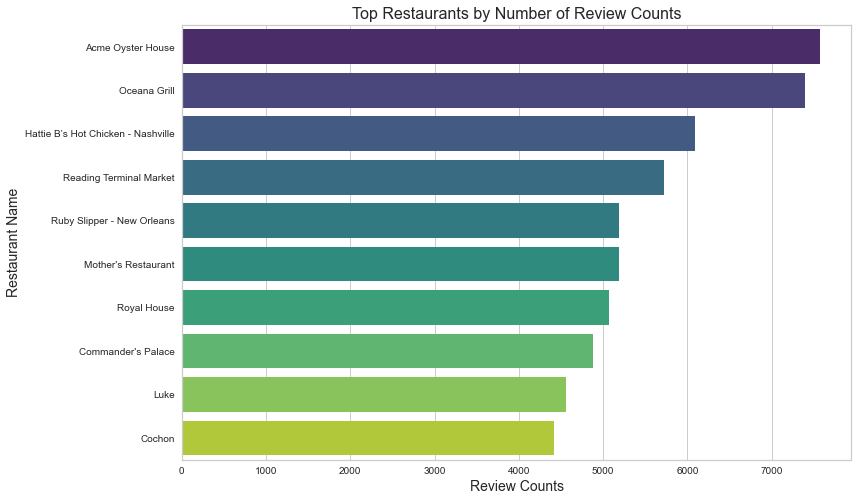

In [134]:
top_restaurants = df.sort_values(by='review_counts', ascending=False).head(10) 

plt.figure(figsize=(12, 8))
sns.barplot(x='review_counts', y='business_name', data=top_restaurants, palette='viridis')
plt.title('Top Restaurants by Number of Review Counts', fontsize=16)
plt.xlabel('Review Counts', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.show()

# PCA

In [55]:

pca = PCA(random_state=42)
pca.fit(df_grouped)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

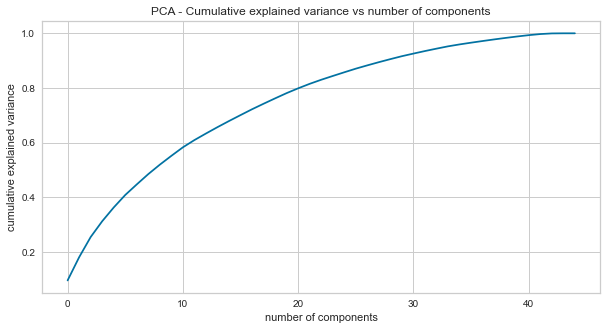

In [56]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [57]:
num_components = 20
pca = PCA(n_components=num_components)
pca.fit(df_grouped)
pca_components = pca.transform(df_grouped)

pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(num_components)])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,0.558052,0.380615,-0.524950,0.061041,-0.143995,0.848291,-0.057842,-0.135621,0.209653,0.501127,0.433551,0.143450,-0.120226,0.145546,0.221668,0.176914,0.003762,-0.043975,0.144482,-0.170704
1,-0.117877,-0.158769,-0.797065,-0.119032,0.226870,0.665398,-0.059201,-0.038072,0.003625,-0.183455,-0.057881,-0.244405,-0.310242,-0.242445,0.365203,-0.055296,0.276523,-0.084871,-0.348109,0.141291
2,-0.355992,-0.364772,0.588936,-0.349340,0.386893,0.139328,-0.739355,-0.135250,-0.058360,0.156145,-0.081381,-0.005852,-0.067258,-0.067499,-0.049912,-0.205138,-0.131313,-0.039999,-0.011586,0.018822
3,0.171235,0.431245,1.066133,-0.344058,-0.178443,0.209747,0.466799,0.388319,-0.472158,-0.308305,0.436109,0.061599,0.077962,0.249615,0.034664,0.233514,0.312676,-0.063479,-0.350268,-0.060281
4,-0.548426,0.465789,-0.025805,-0.141589,-0.358511,-0.241267,0.523084,0.052506,-0.198150,-0.285871,0.707474,-0.200649,0.113247,-0.767583,-0.321666,-0.315847,-0.301182,-0.037451,0.126963,0.284965


In [58]:
pca_df.shape

(17621, 20)

# Clustering 

Elbow Method to determine the number of clusters to be formed:


C:\softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

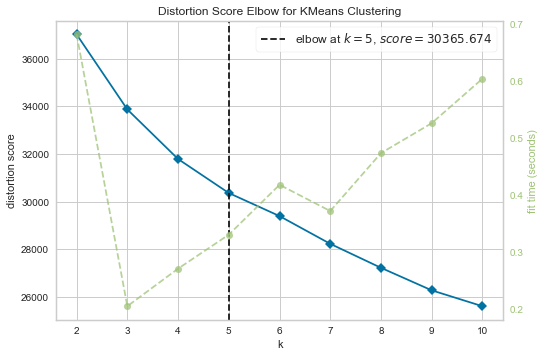

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

In [60]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)

C:\softwares\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

# Assigning labels 

In [61]:
filtered_df = filtered_df.drop('categories',axis=1)
filtered_df.head()

,business_id,business_state,stars,review_counts,categories_list
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,food
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,coffee & tea
0,MTSW4McQd7CbVtyjqoe9mw,PA,4.0,80,bakeries
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,sushi bars
1,MUTTqe8uqyMdBl186RmNeA,PA,4.0,245,japanese


In [62]:
grouped_df = filtered_df.groupby('business_id').agg({
    'business_state': 'first', 
    'stars': 'first',           
    'review_counts': 'first',  
    'categories_list': lambda x: set(','.join(x).split(', ')), 
}).reset_index()
grouped_df

,business_id,business_state,stars,review_counts,categories_list
0,---kPU91CF4Lq2-WlRu9Lw,FL,4.5,24,"{seafood,food}"
1,-0EdehHjIQc0DtYU8QcAig,FL,3.0,35,{chinese}
2,-0FX23yAacC4bbLaGPvyxw,PA,3.5,155,{american (traditional)}
3,-0TffRSXXIlBYVbb5AwfTg,PA,4.5,1097,"{cocktail bars,nightlife,breakfast & brunch,fo..."
4,-0__F9fnKt8uioCKztF5Ww,LA,4.0,66,"{cafes,nightlife,cocktail bars}"
...,...,...,...,...,...
17616,zyFlGv7TXKquCmXrC8cp4Q,AB,2.5,27,{american (traditional)}
17617,zyHP-oXgDkANEyQbJVKf8g,TN,4.0,124,"{food,breakfast & brunch}"
17618,zyPz0xvE5XkeCVH2J7g2gw,TN,3.5,280,"{american (new),food,breakfast & brunch,nightl..."
17619,zz0l4dUf28wzPAaTdGqsSw,DE,4.5,173,{mexican}


In [113]:
pca_df['labels'] = kmeans.labels_

In [115]:
pca_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,labels
0,0.558052,0.380615,-0.524950,0.061041,-0.143995,0.848291,-0.057842,-0.135621,0.209653,0.501127,...,0.143450,-0.120226,0.145546,0.221668,0.176914,0.003762,-0.043975,0.144482,-0.170704,1
1,-0.117877,-0.158769,-0.797065,-0.119032,0.226870,0.665398,-0.059201,-0.038072,0.003625,-0.183455,...,-0.244405,-0.310242,-0.242445,0.365203,-0.055296,0.276523,-0.084871,-0.348109,0.141291,3
2,-0.355992,-0.364772,0.588936,-0.349340,0.386893,0.139328,-0.739355,-0.135250,-0.058360,0.156145,...,-0.005852,-0.067258,-0.067499,-0.049912,-0.205138,-0.131313,-0.039999,-0.011586,0.018822,0


In [63]:
grouped_df['labels'] = kmeans.labels_

In [142]:
grouped_df.head(15)

,business_id,business_state,stars,review_counts,categories_list,labels
0,---kPU91CF4Lq2-WlRu9Lw,FL,4.5,24,"{seafood,food}",1
1,-0EdehHjIQc0DtYU8QcAig,FL,3.0,35,{chinese},3
2,-0FX23yAacC4bbLaGPvyxw,PA,3.5,155,{american (traditional)},0
3,-0TffRSXXIlBYVbb5AwfTg,PA,4.5,1097,"{cocktail bars,nightlife,breakfast & brunch,fo...",4
4,-0__F9fnKt8uioCKztF5Ww,LA,4.0,66,"{cafes,nightlife,cocktail bars}",4
5,-0iIxySkp97WNlwK66OGWg,NV,3.5,219,"{sandwiches,coffee & tea,food}",1
6,-0jK77zdE3-plqXuwXtilQ,NJ,4.0,68,"{italian,seafood,pizza,sandwiches}",2
7,-0jzoPt3UeXn6FUXVQvyPg,ID,4.5,154,{american (new)},3
8,-1B9pP_CrRBJYPICE5WbRA,PA,4.0,822,"{asian fusion,american (new),thai,chinese}",0
9,-1EGqUQFBmGEp76CE-Zk4Q,TN,3.5,33,{mexican},3


In [ ]:
grouped_df[grouped_df['labels'] == 1].count()

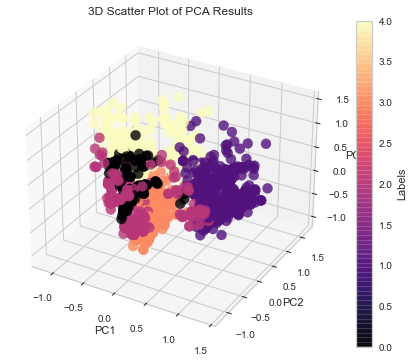

In [133]:
np.random.seed(0)  # Set random seed for reproducibility
selected_indices = np.random.choice(pca_df.index, size=2000, replace=False)
selected_points = pca_df.loc[selected_indices]

# Plot the 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for selected points
ax.scatter(selected_points['PC1'], selected_points['PC2'], selected_points['PC3'],
           c=selected_points['labels'], cmap='magma', s=100, alpha=0.8)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of PCA Results')

# Show colorbar for labels
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Labels')

# Show the plot
plt.show()

# Similarity 

In [66]:

pca_df = pd.DataFrame(pca_df)
cosine_sim = cosine_similarity(pca_df.values)

def find_nearest_neighbors(business_id, cosine_sim_matrix, df):
    idx = df.index[df.index == business_id].tolist()[0]

    similarity_scores = cosine_sim_matrix[idx]
    similar_indices = similarity_scores.argsort()[::-1][1:]  # Get top similar rows (excluding itself)
    similar_businesses = df.iloc[similar_indices]
    
    return similar_businesses

target_business_id = 3 
nearest_neighbors = find_nearest_neighbors(target_business_id, cosine_sim, pca_df)

print("Nearest Neighbors:")
print(nearest_neighbors)


Nearest Neighbors:
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
9582   0.260720  0.327239  1.015972 -0.318911 -0.067117  0.193886  0.303958   
5692   0.257757  0.330579  1.006599 -0.310934 -0.054669  0.217785  0.307257   
15847  0.161292  0.405561  1.099525 -0.301600 -0.135399  0.203400  0.292399   
437    0.480569  0.443090  1.100182 -0.328701  0.003488  0.160782  0.345757   
311    0.496422  0.451937  1.094211 -0.330069  0.004751  0.162528  0.358751   
...         ...       ...       ...       ...       ...       ...       ...   
15576 -0.120680 -0.236669 -0.403500 -0.172208  0.034381 -0.174272 -0.033858   
5288  -0.120649 -0.236734 -0.403520 -0.172196  0.034358 -0.174268 -0.033911   
12859 -0.112769 -0.232212 -0.406475 -0.172899  0.035024 -0.173402 -0.027334   
9392  -0.112730 -0.232296 -0.406501 -0.172883  0.034995 -0.173396 -0.027402   
11624 -0.112703 -0.232352 -0.406519 -0.172872  0.034976 -0.173392 -0.027447   

            PC8       PC9      P

# Recomendation


In [152]:
def recommend_similar_restaurants(restaurant_name, num_recommendations):
    matched_indices = df_processed.index[df_processed['business_name'].str.lower() == restaurant_name.lower()].tolist()
    
    if not matched_indices:
        print(f"No restaurant named '{restaurant_name}' found.")
        return []
    
    idx = matched_indices[0] 
    similarity_scores = cosine_sim[idx]
    sorted_indices = similarity_scores.argsort()[::-1]
    top_recommendations = sorted_indices[1:num_recommendations + 1]
    recommended_restaurants = df_processed.iloc[top_recommendations]['business_name'].tolist() 
    return recommended_restaurants

query_restaurant = 'St Honore Pastries'
num_recommendations = 8

recommended_restaurants = recommend_similar_restaurants(query_restaurant, num_recommendations)
print(f"{num_recommendations} Recommended Similar Restaurants for '{query_restaurant}':")
print(recommended_restaurants)

8 Recommended Similar Restaurants for 'St Honore Pastries':
['Tuna Bar', 'Ardmore Pizza', 'Craft Hall', 'BAP', 'Top Shelf Sports Lounge', '39 North Taproom & Grill', "Sharky's Sports Bar & Grill", 'Twin Peaks']
